Importing libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Importing dataset

In [18]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

Implementing UCB

In [19]:
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0,d):
        if (numbers_of_selections[i]>0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n+1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    sums_of_rewards[ad] += dataset.values[n, ad] 

Visualizing the results

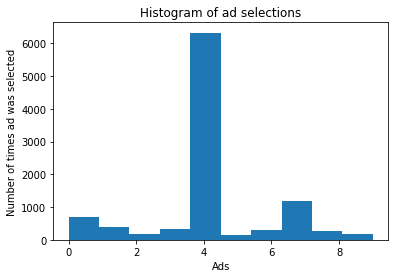

In [20]:
plt.hist(ads_selected)
plt.title("Histogram of ad selections")
plt.xlabel("Ads")
plt.ylabel("Number of times ad was selected")
plt.show()